In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import gzip
import shutil
from matplotlib import pyplot as plt
from pprint import pprint
from intake import open_esm_datastore
import pandas as pd
import cftime
import json
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from common_functions import _expt_name_combo, _read_ryaml, plot_time_series_combo, plot_time_series_combo2, _set_default_plt_params, plot2d, plot3d,plot3d2,plot3d3
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from access_nri_intake.source.builders import AccessOm3Builder

In [3]:
yaml_input = 'Expts_manager_10_year_insan_runs_longer.yaml'
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_input_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
MOM_names = [contrl_name] + list(expt_names)
# MOM_dirs = list(MOM_expt_dir1)
# MOM_names = list(expt_names)

pprint(MOM_names)
pprint(MOM_dirs)

['DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800',
 'DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400',
 'DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600']
['Ctrl-1deg_jra55do_ryf2',
 'lexpt7',
 'lexpt9',
 'lexpt11',
 'lexpt13',
 'lexpt15',
 'lexpt16',
 'lexpt17']


In [ ]:
builder = AccessOm3Builder(
    path = "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1/lexpt16/archive"
).build()

In [ ]:
builder.save(
    name="intake_esm_ds", 
    description="An example datastore for ACCESS-OM3",
)

In [24]:
def change_intake_filepath(path):
    with open(path, 'r') as f:
        config = json.load(f)
    config['catalog_file'] = os.path.join(f'file://{archive_path}', 'intake_esm_ds.csv.gz')
    with open(path, 'w') as f:
        json.dump(config, f, indent=4)

In [55]:
tmp_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1'
for i in MOM_dirs:
    file_path = os.path.join(f"{output_expt_path}",f"{i}","archive", "intake_esm_ds.csv.gz")
    print(file_path)
    old_path = tmp_expt_path
    new_path = output_expt_path
    with gzip.open(filepath, 'rt') as f:
        df = pd.read_csv(f)

    df['path'] = df['path'].str.replace(old_path,new_path,regex=False)
    temp_file_path = file_path + '.tmp'

    with gzip.open(temp_file_path, 'wt') as f:
        df.to_csv(f, index=False)

    shutil.move(temp_file_path, file_path)

/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1/Ctrl-1deg_jra55do_ryf2/archive/intake_esm_ds.csv.gz


AttributeError: 'Series' object has no attribute 'split'

In [58]:
output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1'
intake_esm_ds = 'intake_esm_ds.json'

datastore_tot = []
MOM_dirs_tot = []
MOM_names_tot = []
for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    change_intake_filepath(datastore_path)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in MOM_names_tot]
extracted_MOM_names_tot[0] = 'Contrl_DT_THERM_1800'
extracted_MOM_names_tot

['Ctrl-1deg_jra55do_ryf2',
 'lexpt7',
 'lexpt9',
 'lexpt11',
 'lexpt13',
 'lexpt15',
 'lexpt16',
 'lexpt17']
['DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800',
 'DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400',
 'DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600']
[<intake_esm_ds catalog with 4594 dataset(s) from 5976 asset(s)>,
 <intake_esm_ds catalog with 4594 dataset(s) from 5976 asset(s)>,
 <intake_esm_ds catalog with 4594 datase

['Contrl_DT_THERM_1800',
 'DT_THERM_54000',
 'DT_THERM_36000',
 'DT_THERM_18000',
 'DT_THERM_7200',
 'DT_THERM_10800',
 'DT_THERM_14400',
 'DT_THERM_3600']

In [57]:
datastore_expts[0]

,unique
path,5976
realm,2
variable,229
frequency,3
start_date,882
end_date,883
variable_long_name,88
variable_standard_name,46
variable_cell_methods,21
variable_units,24


0
1
2
3
4
5
6
7


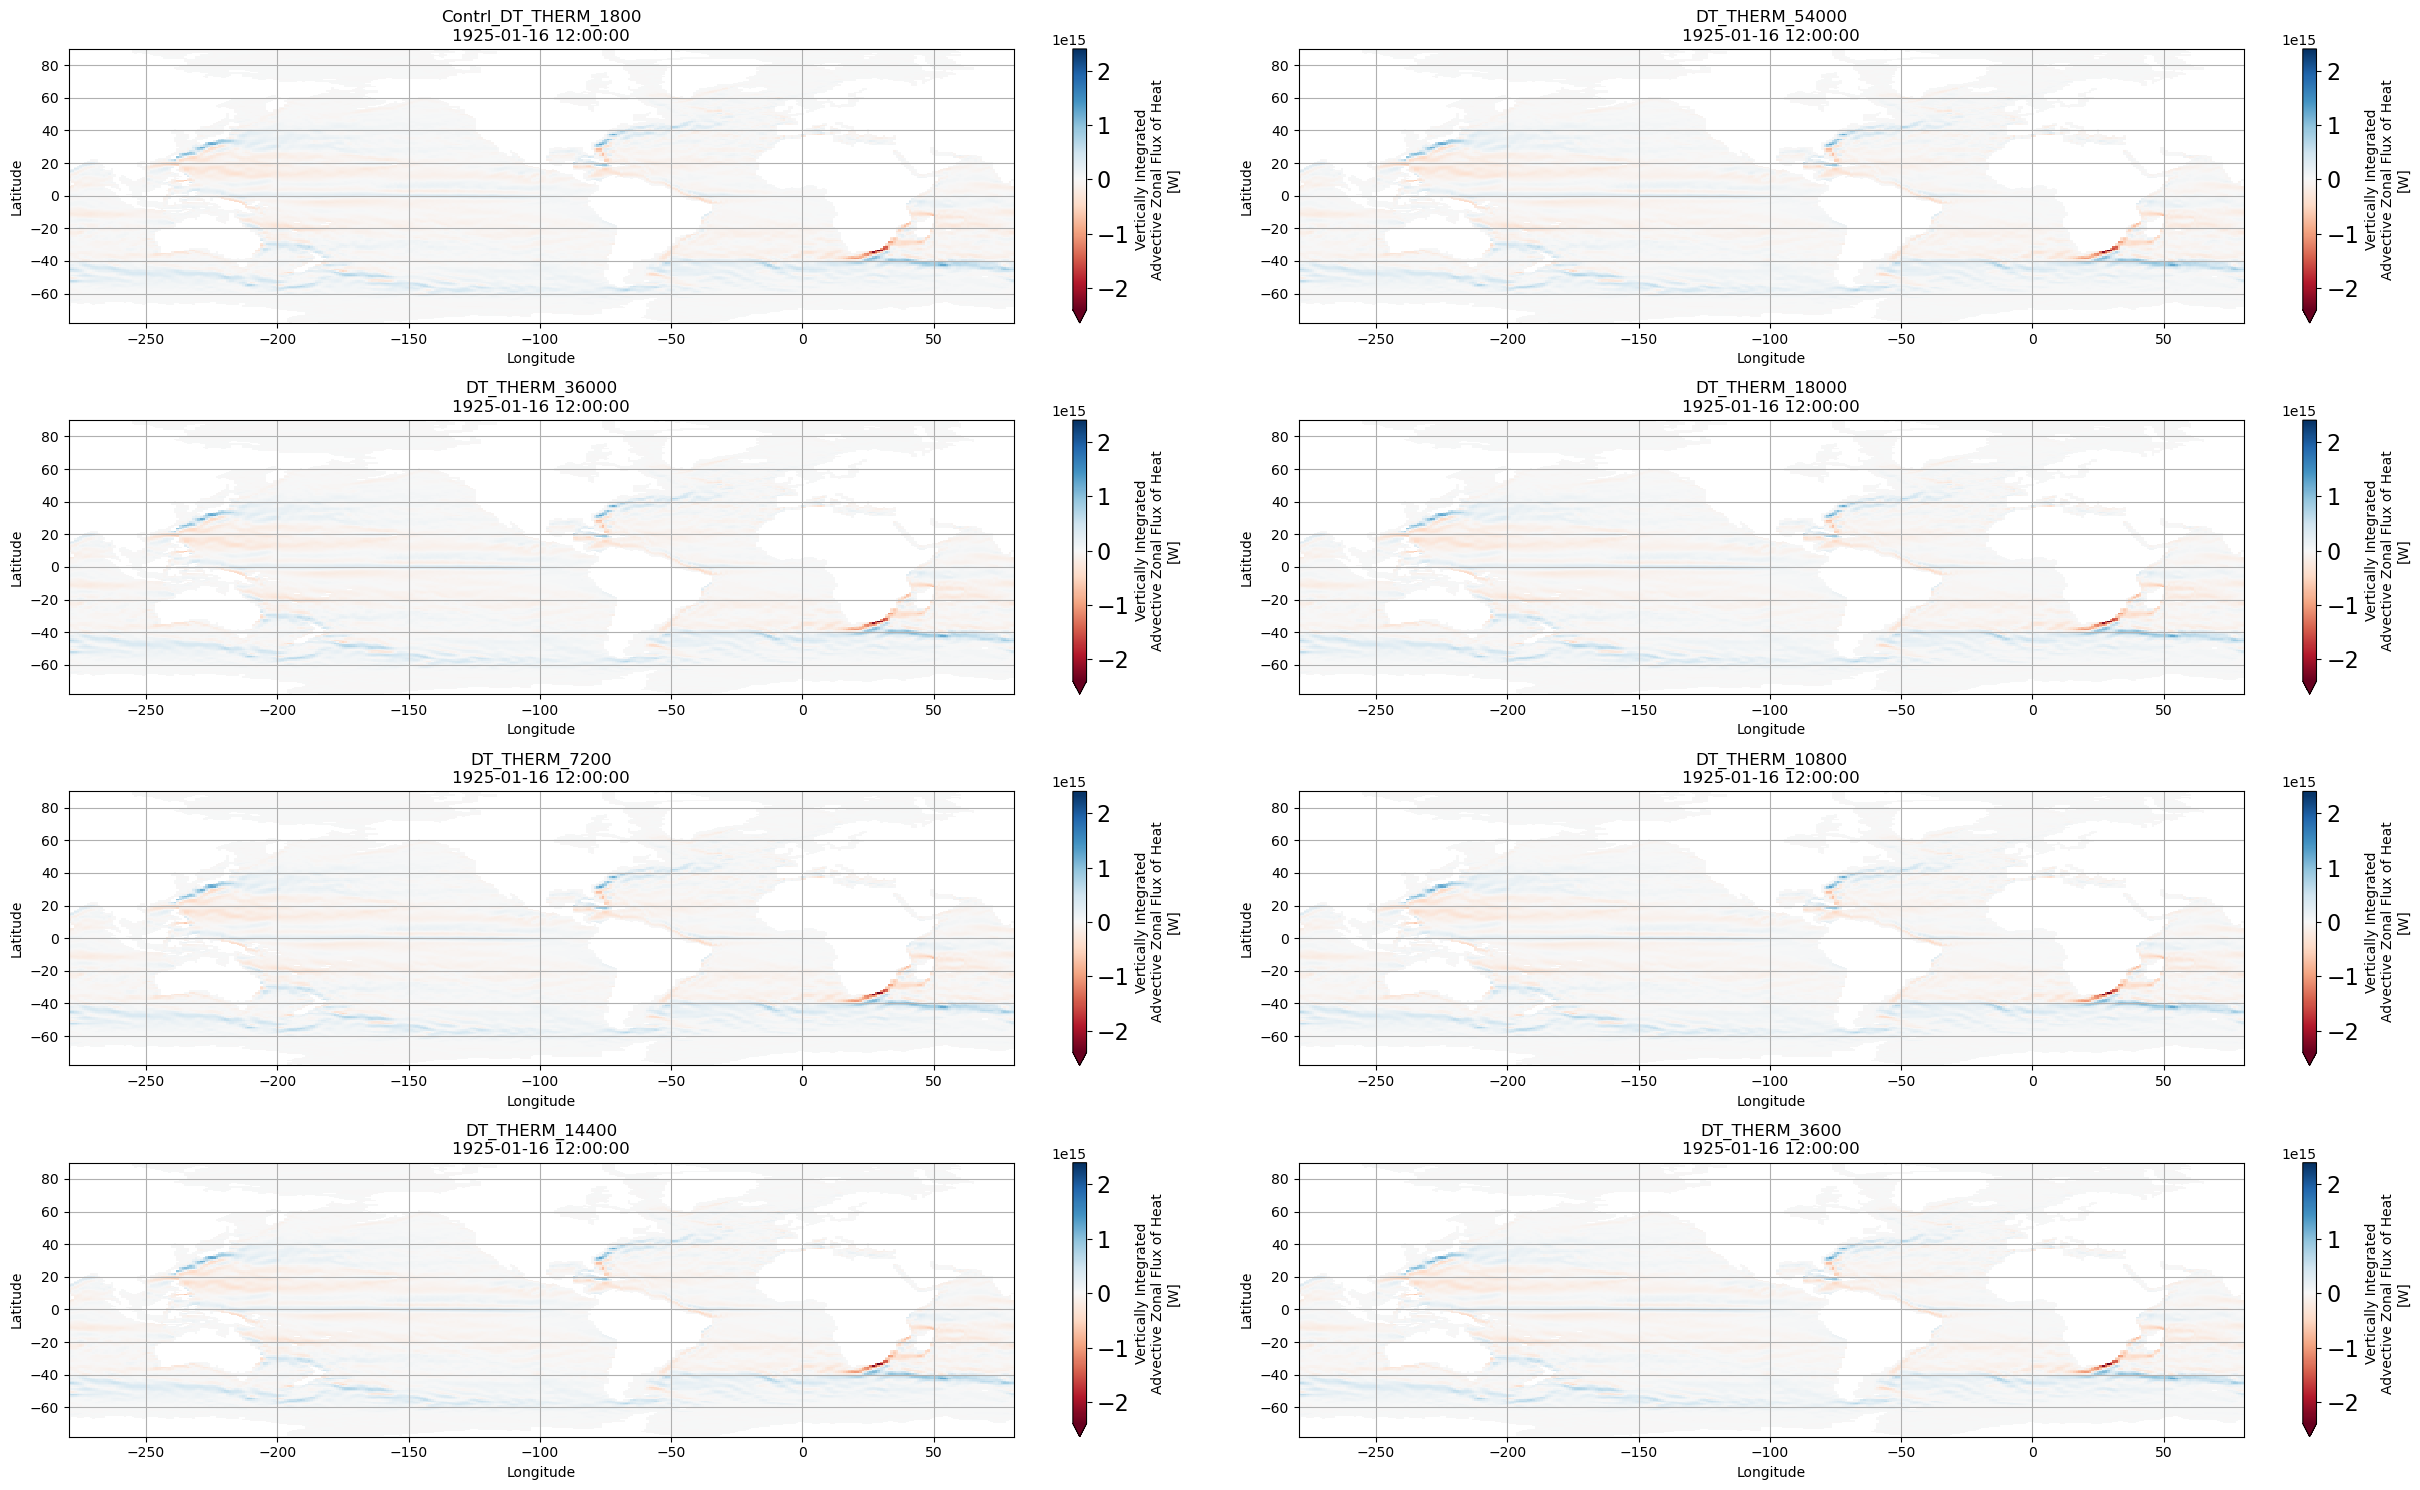

In [60]:
var = 'T_adx_2d'
common_time = pd.Timestamp('1925-01-01 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = list(range(8))
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d3(datastore_expts,
        MOM_names_expts,
        var,
        depth_level = None,
        time_selection = 'index',
        time_index = -1,
        common_time = common_time,
        ncols=2,
        figsize=(25,15),
        cbar_range=[-2.4e15,2.4e15]
       )